In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Códigos importantes aula 1
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

# Aula 02

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso Boxplot.

Para inciar vamos precisar resolver alguns dos desafios deixados na **aula 01** (Caso não tenha tentado resolver os desafios, recomendo tentar algumas vezes antes de olhar as repostas). Começando pelo exercício 05, onde precisamos segregar os gêneros de cada um dos filmes contidos na base de dados do **Movie Lens**.

Vamos relembrar como os dados estavam configurados.

In [26]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Temos os títulos e uma coluna com os respectivos gêneros, todos em uma única coluna, cada *label* é separada com um **|** (Adventure|Children|Fantasy) sendo do tipo *string*. 

Para solucionar nosso problema precisamos separar cada um dos gêneros para então realizar a contagem. Existe várias formas de resolver este problema, por exemplo, desde métodos inputos das *strings* até as **regex**, mas como estamos usando o pandas já temos algo para facilitar nosso processamento dos dados. 

Vamos aplicar o método e logo em seguida explicar a saída geranda.

In [27]:
filmes["generos"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Nossa, uma linha de código gerou essa tabelona cheia de linhas, colunas e números.


Como você percebeu a saída é um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero **único** virou uma coluna no DF). O que você deve estar se perguntando é como os valores **0/1** são preenchidos?.

Para explicar, vamos pegar os gêneros do filme **Jumanji**, **Adventure|Children|Fantasy**, na coluna dos repectivos gêneros (dataframe gerado por ```filmes["generos"].str.get_dummies('|')```) o valor será **1**, para todos os outros gêneros, que não são gêneros do filme Jumanji, vale **0**. Em suma, se o nome da coluna pertence a algum gêreno do respectivo filme, o valor será **1** caso contrário 0 (Se ainda não ficou claro, pegue alguns filmes e confira os resultas na tabela anterior).


Até aqui resolvemos uma parte do problema, agora precisamo somar quantos **1** cada coluna tem.



In [28]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Ótimo, resolvemos o desafio e agora temos quantas vezes cada gênero aparece. Assim, fica fácil de reponder perguntar como, qual o gênero com mais filmes produzidos? Qual o menos? Qual o segundo? (Lembrando que o dado está restrito as informações do movie lens)

Se você tentou reponder, deve ter notado que não foi tão fácil assim, as informações não estão ordenadas e toda hora você precisa percorrer a tabela para fazer comparações. Nós podemos melhor isso ordenando as informações.

In [29]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Maravilha, agora tudo ficou mais fácil! 

Conseguimos responder as perguntas anterior sem grandes dificuldades. Mas ainda podemos melhor mais a forma de expor nossa informação, não acha? 

Que tal uma imagem para visualizar? (Desafio 07 da aula 01)

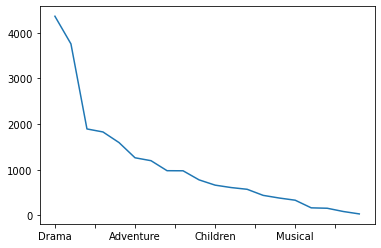

In [30]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

Iniciamos com o plot padrão do pandas, e como percebemos não adianta só plotar uma imagem, é preciso que faça sentido para a informação que queremos analisar, um gráfico de linhas não está fazendo muito sentido!

Temos um gráfico muito conhecido que sempre encontramos por aí, o famoso gráfico de pizza ou torta. 

Já que ele é tão famoso talvez seja uma boa ideia tentar!

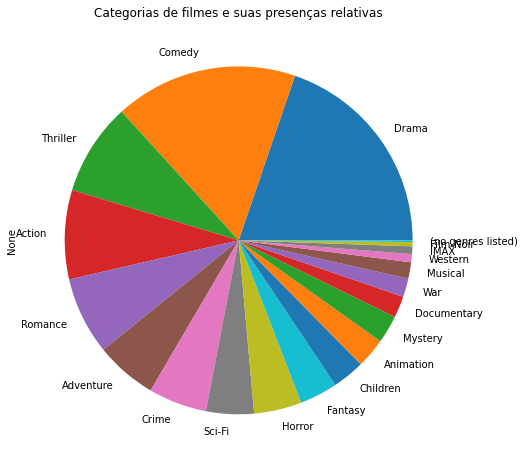

In [31]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

E aí o que você achou? 

Algo que fica evidente neste gráfico é que **Drama, Comedy, Thriller, e Action** tem proporções "grandes", mas qualquer outra análise fica complicada. 

Primeiro, as cores começa a se repetir e isso não é o ideial.

Segundo, repare nos gêneros com menos filmes,consegue tirar alguma informação de lá? é muito difícil de analisar.

Quarto, vamos tentar comparar **thriller e Action**, qual está presente em mais filmes? Difícil responder, quando estamos trabalhando com gráficos tipo esse fazemos comparações entre área, não somos bons nisso.


Por fim, o importante de uma visualização é que ela seja **"transparente"** ao intuíto de nossa análise. Ou seja, estamos querendo analisar as informações de quantidade, comparando as labels de forma geral e evidênciando de maneira clara as diferenças entre elas (proporções).

Portanto, o gráfico de pizza não torna as comparações claras, sendo assim uma má ideia. 

Vamos construir juntos uma solução mais adequada!


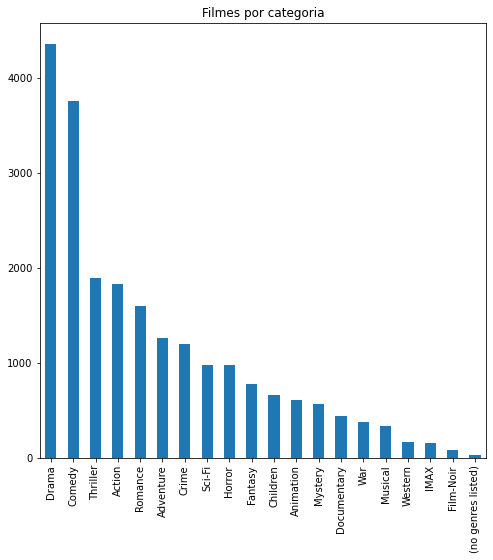

In [32]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

Mudamos da pizza para a barra, alterando apenas o parâmetro kind do método.

 Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre **Drama e Comedy**, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar **Thriller e Action**, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tprnar evidênte essa informação vamos utilizar algo "semelhante" a um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map).

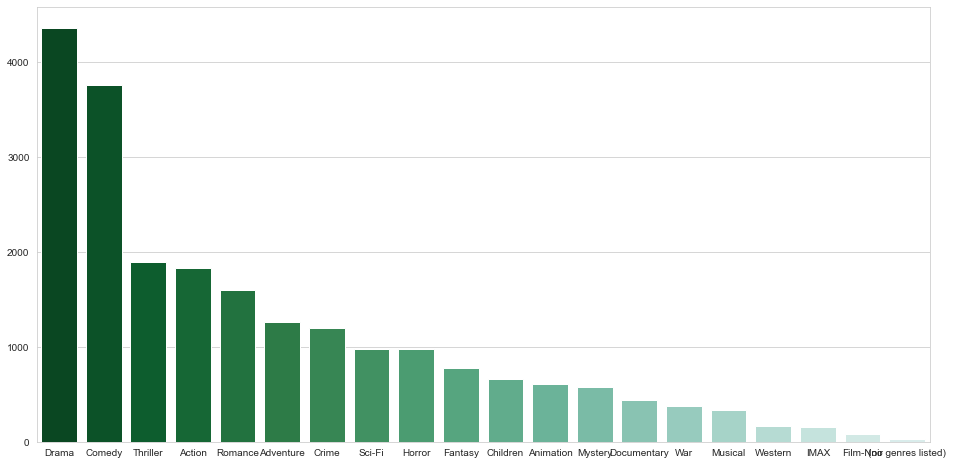

In [33]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Já, já explicamos o que foi feito em toda imagem, por agora repare como a imagem passa muito mais informação. Conseguimos comparar de forma fácil entre os gêneros e através do **mapa de calor** (gêneros com maior número tem um verde muito mais forte, gêneros com menor número é praticamente transparente) evidênciamos quais são as labels com maior participação, médias e insignificantes. Toda essa informação em uma única imagem!

Bom, agora vamos entender como foi o código.

Primeiro, não plotamos mais a imagem com o `.plot()` do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o [seaborn](https://seaborn.pydata.org/).

Segundo, chamamos o barplot do **seaborn**, adicionando uma **paleta de cores** com efeito de mapa de calor (parâmetro pallette), no parâmetro `n_color` de `sns.color_palette()` adicionamos **+4** para que a última barra não seja totalmente transparente.

Terceiro, também adicionamos o **sns.set_style("whitegrid")** para que todos os gráficos tenham a **linha de grade do eixo X** evidênte, facilitando a comparação entre as barras.

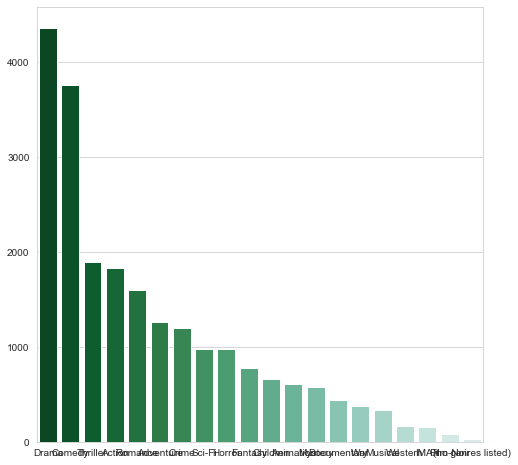

In [34]:
import seaborn as sns

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Por fim, mudamos o tamanho da imagem com o **figsize** do método`plt.figure()`. Assim, temos um gráfico com muitas informações e agradável de analisar.


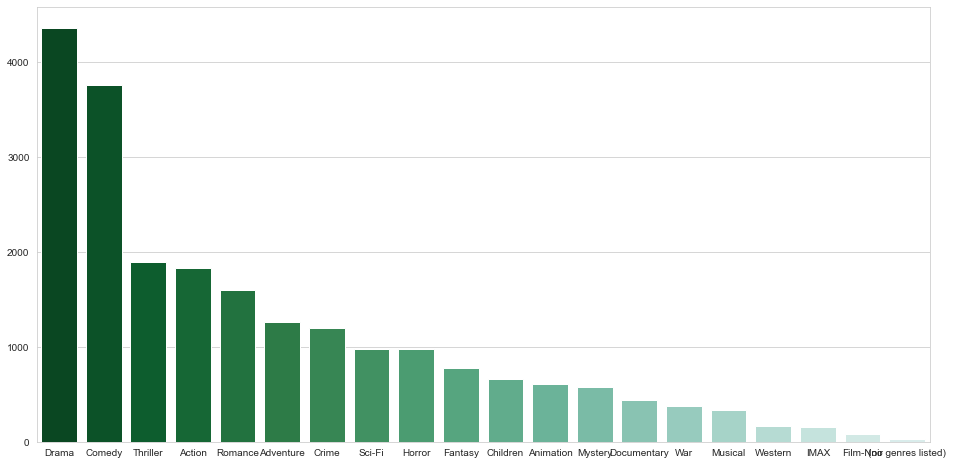

In [35]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na **aula 01** calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [36]:
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das ntoas para comparar alguns filmes. Por exemplo, **Toy Story e Jumanji**

3.9209302325581397


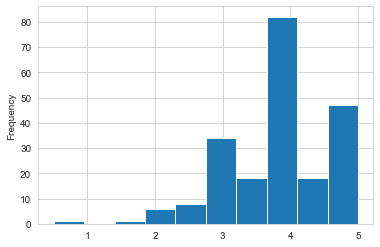

In [37]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


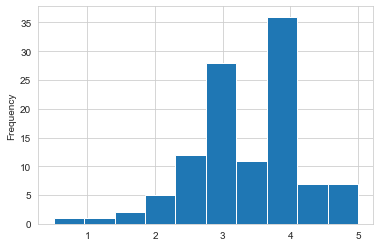

In [38]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados. 

Lembra o exemplo que o Guilherme Silveira deu em aula comparando os sálarios de uma cidade? Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades. 

```python
#Cidada A
populacao = 1000
salario = 1100

media = 1100

#Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100

media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00
```

P.S: Se tiver dúvidas reveja essa parte da aula e tente enteder o problema da média.


Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a [mediana](https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica))

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [39]:
filmes_com_media.sort_values("nota", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


Bom, ordenando os filmes pela nota médias e [fatiando](https://www.alura.com.br/artigos/listas-no-python) os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime *Wizard of Oz, **filmeId=919** e *Little Miss Sunshine* **filmeId=46578**.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [40]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

Definimos nossa [função plot em python](https://www.caelum.com.br/apostila-python-orientacao-objetos/funcoes/#parmetros-de-funo) e repare que estamos usando **F-string** para fazer a interpolação dos dados, se tiver tiver dúvida veja essa [explicação no fórum da alura](https://cursos.alura.com.br/forum/topico-para-que-serve-o-print-f-no-python-77720).

Agora precisamos chamar a função!

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

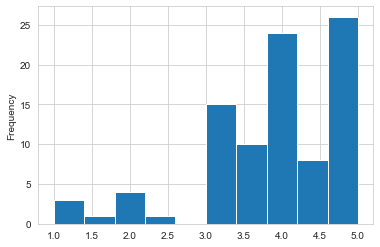

In [41]:
#Mágico de Oz
plot_filme(919)



A função plot, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a função agora para o filme *Little Miss Sunshine*.

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

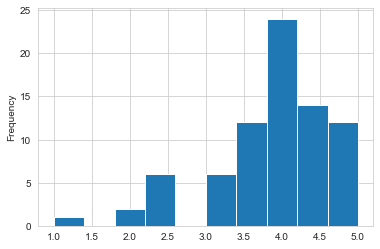

In [42]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

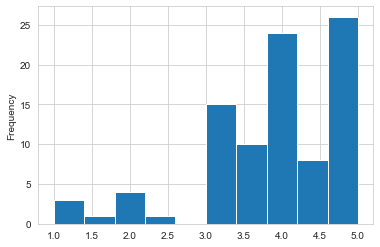

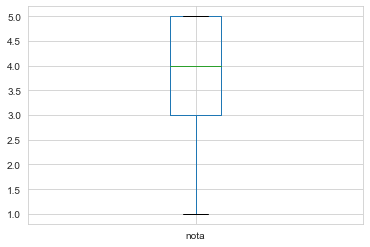

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [43]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

E aí, viu como é simples criar criar um [boxplot com o pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)?

Apenas chamamos o método ```.plot.box()```, agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.


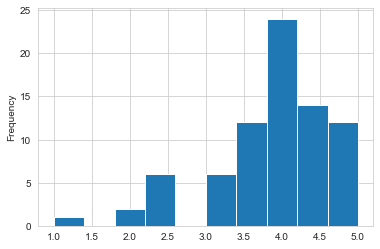

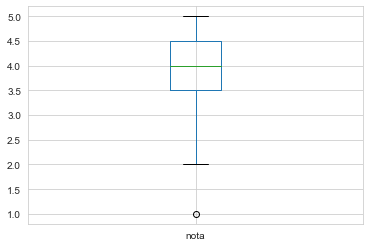

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [44]:
plot_filme(46578)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em **y=1**. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de [outliers](https://pt.wikipedia.org/wiki/Outlier), existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do [wikipedia](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o **seaborn**, para aprendermos outra forma de plotar boxplot!


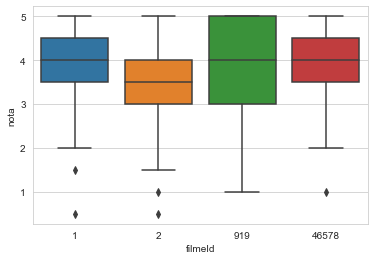

In [45]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o `.query()` para selecionar os dados), **x** é o Id do filme e **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais claram tente realiza a análise aí na sua casa!


Com isso nós fechamos nossa segunda aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!




## Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

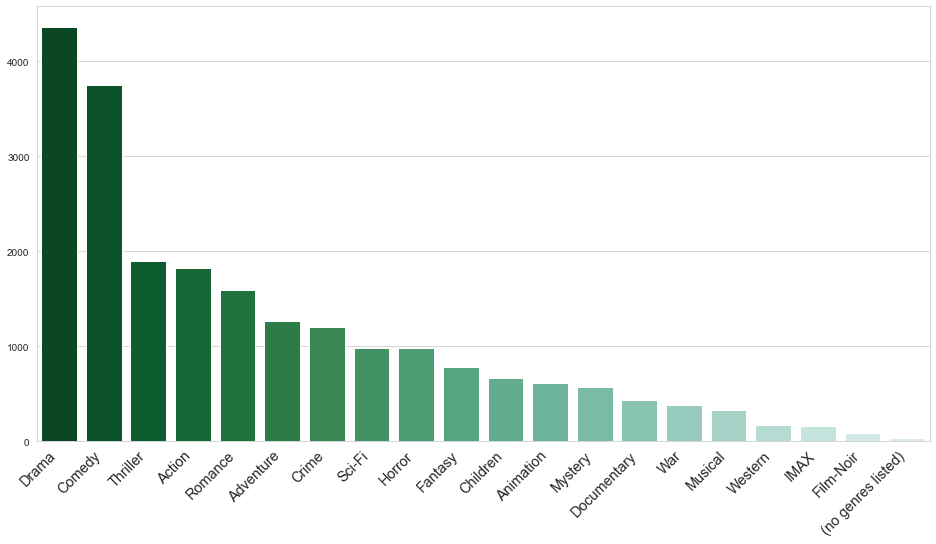

In [46]:
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))

# Vamos fazer do seaborn plot um objeto:
green_chart = sns.barplot(x=filmes_por_genero.index,
                          y=filmes_por_genero.values,
                          palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

# rotacionando o thick, aumentando fonte e centralizando
green_chart.set_xticklabels(
    green_chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'x-large'
)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [47]:
# Talvez essa não seja a resolução convencional, mas foi assim que eu pesnei:
filmes_com_media_igual = filmes_com_media[filmes_com_media['nota'] == 3.9]
keys = filmes_com_media_igual['filmeId']
avaliacoes_subset = avaliacoes[avaliacoes['filmeId'].isin(keys)]
avaliacoes_subset = avaliacoes_subset.merge(filmes_com_media_igual, on="filmeId", how='left')
avaliacoes_subset.columns = ['usuarioId', 'filmeId', 'nota_usuario', 'momento', 'titulo', 'generos', 'nota_media']
avaliacoes_subset['titulo'] = avaliacoes_subset['titulo'].astype('category')
avaliacoes_subset.head()

,usuarioId,filmeId,nota_usuario,momento,titulo,generos,nota_media
0,4,4034,5.0,986848753,Traffic (2000),Crime|Drama|Thriller,3.9
1,16,1147,4.0,1377477315,When We Were Kings (1996),Documentary,3.9
2,18,7018,3.5,1486854151,Presumed Innocent (1990),Crime|Drama|Thriller,3.9
3,18,128620,3.5,1502901639,Victoria (2015),Crime|Drama|Romance,3.9
4,22,4034,4.5,1268726741,Traffic (2000),Crime|Drama|Thriller,3.9


In [48]:
avaliacoes_subset.filmeId.unique()

array([  4034,   1147,   7018, 128620,   5617,   1050,   1785,   2871,
        26258, 114935, 187595,  27846,  95858,  56251,    116,   1366,
         6283,   6985,  70599,  26084,   2176,     97,   5570,   8607,
         5876,   3871,    973])

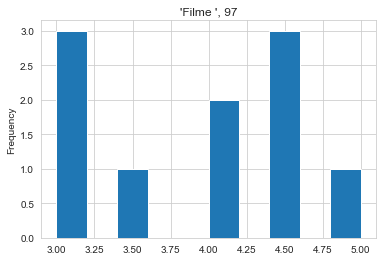

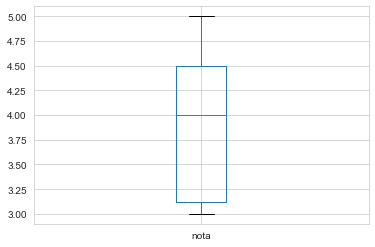

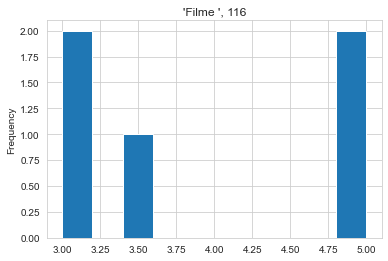

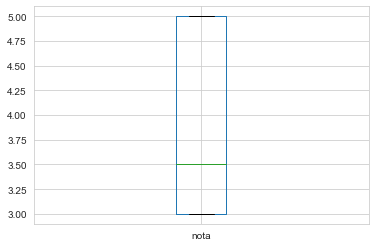

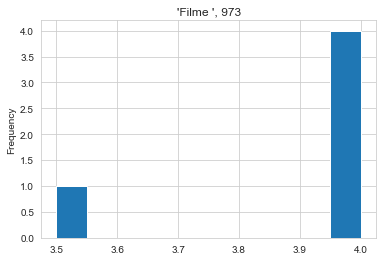

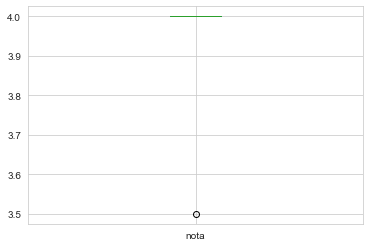

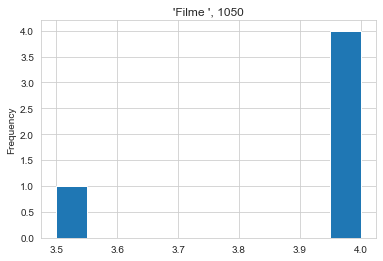

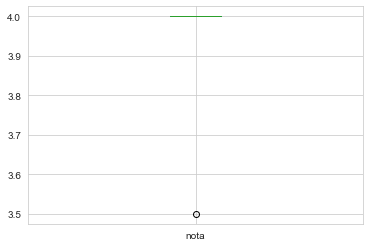

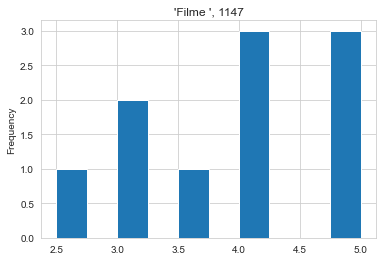

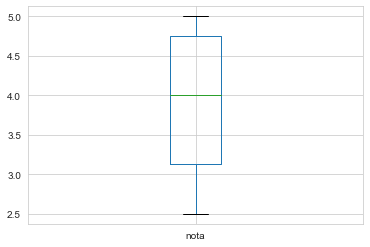

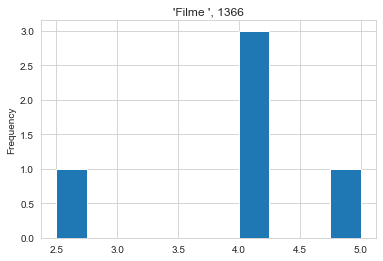

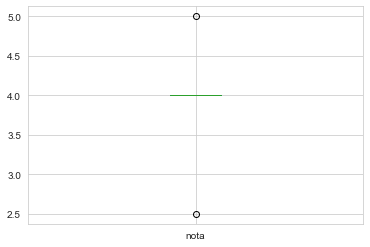

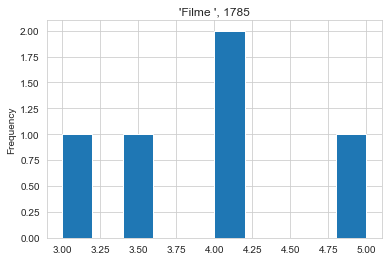

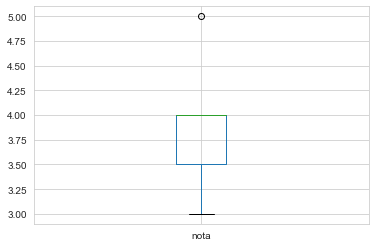

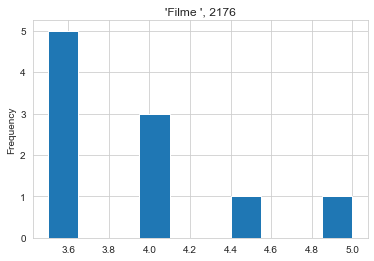

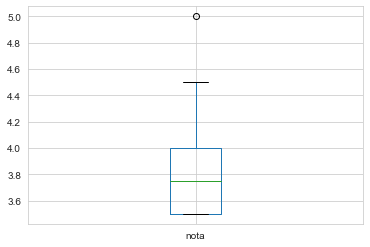

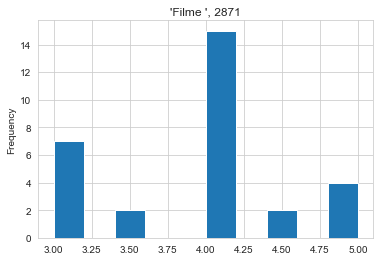

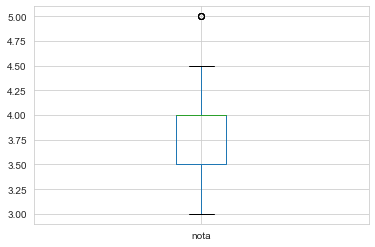

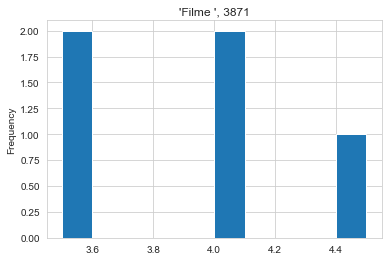

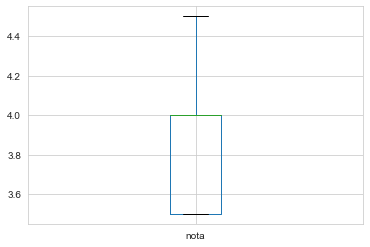

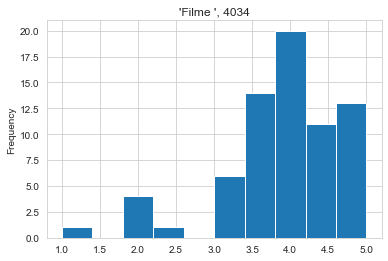

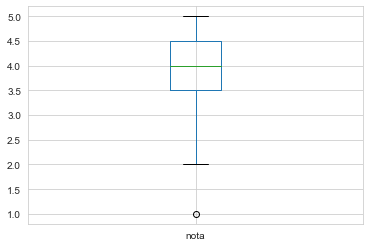

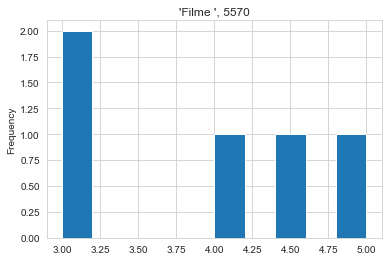

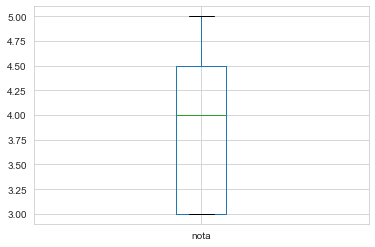

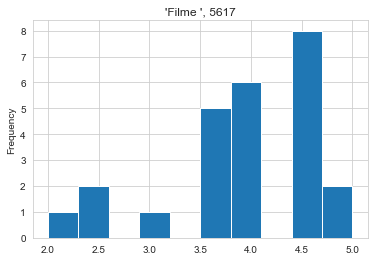

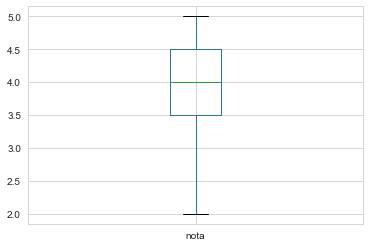

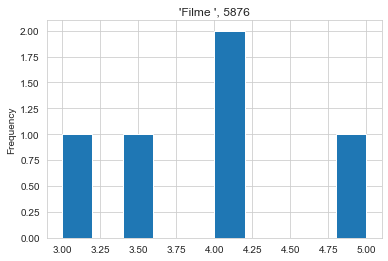

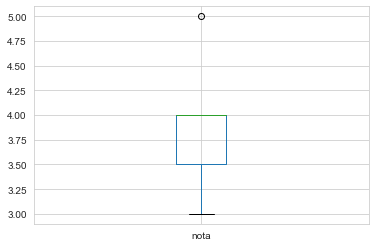

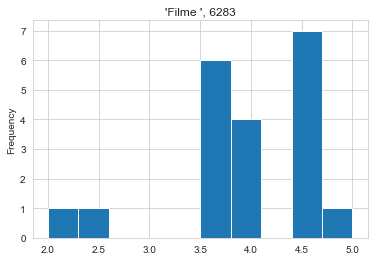

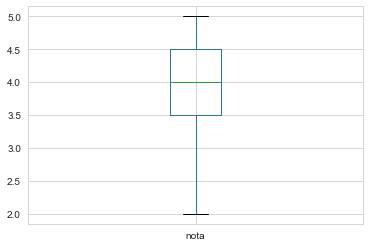

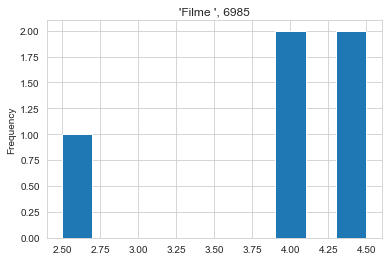

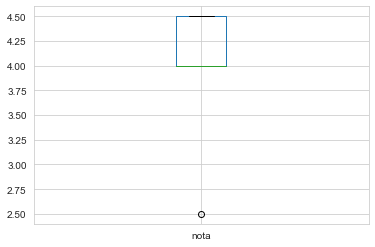

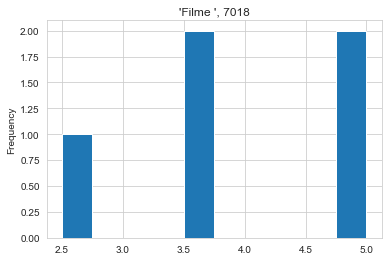

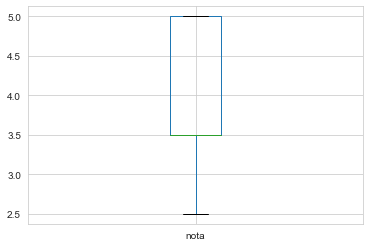

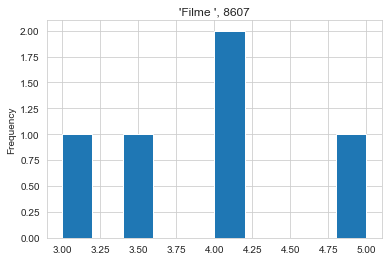

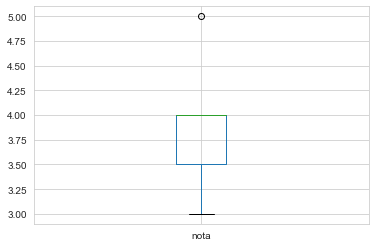

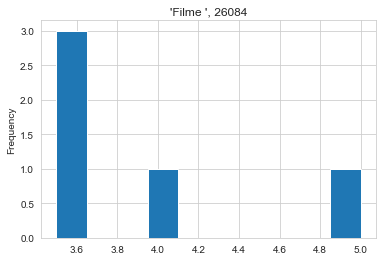

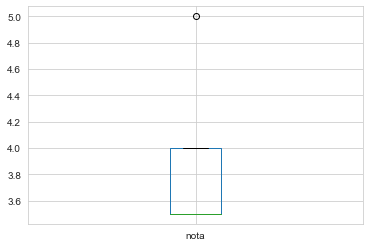

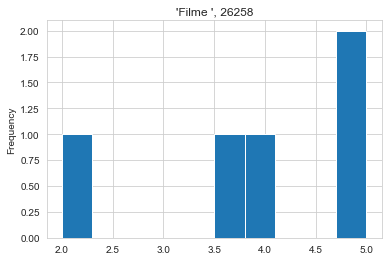

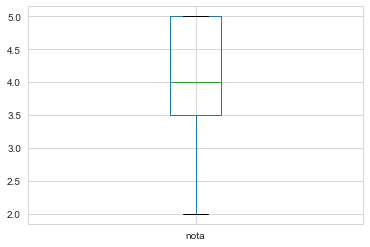

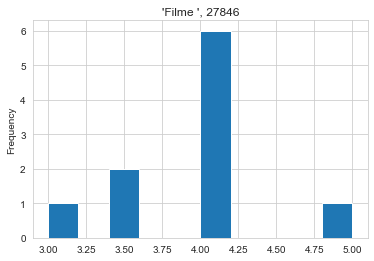

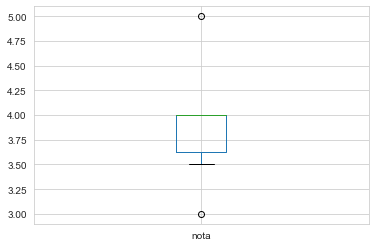

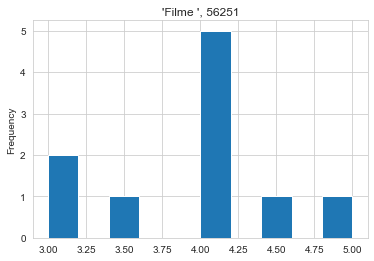

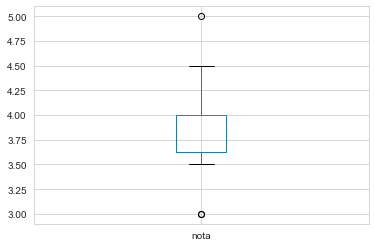

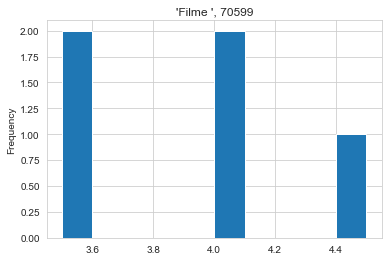

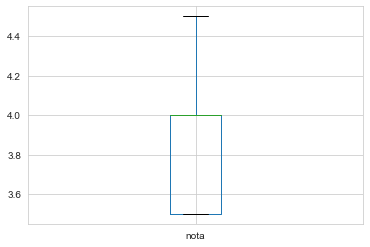

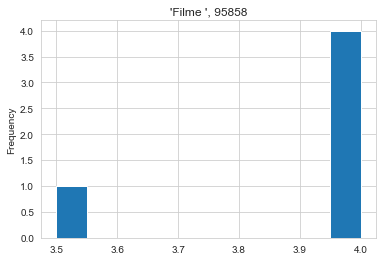

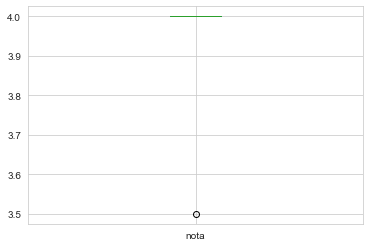

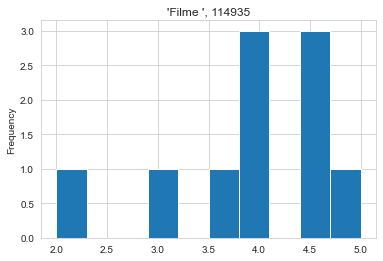

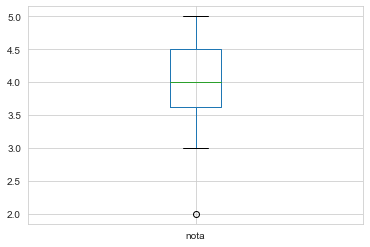

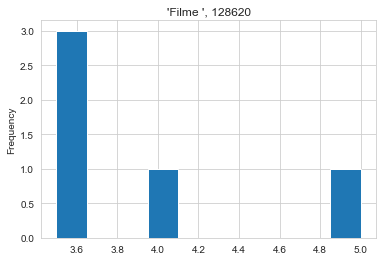

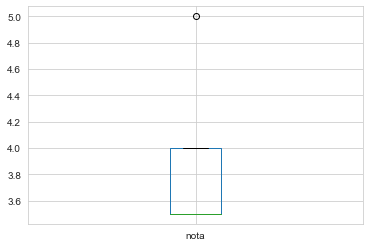

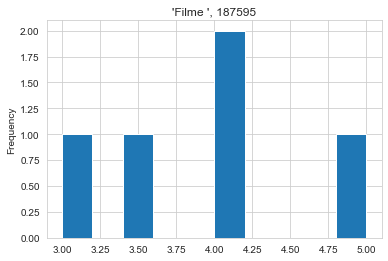

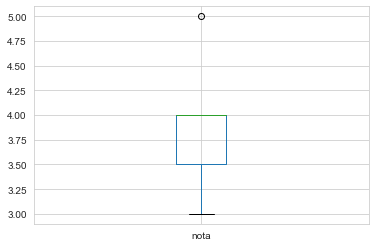

In [49]:
# Aqui uma opção não muito elegante
# Primeiro quero mudar a função do guilherme um pouco só pra mostrar um titulo
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist', title = (f"'Filme ', {n}"))
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()


for i in filmes_com_media_igual.filmeId:
    plot_filme(i)

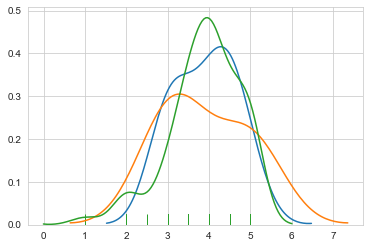

In [50]:
# Aqui talvez uma forma mais elegante
import numpy as np
import pandas as pd
import seaborn as sns

# vamos pegar 3 dos filmes com nóta média igual e analisar suas distribuições
target_0 = avaliacoes_subset.loc[avaliacoes_subset['filmeId'] == 97]
target_1 = avaliacoes_subset.loc[avaliacoes_subset['filmeId'] == 116]
target_2 = avaliacoes_subset.loc[avaliacoes_subset['filmeId'] == 4034]

sns.distplot(target_0[['nota_usuario']], hist=False, rug=True)
sns.distplot(target_1[['nota_usuario']], hist=False, rug=True)
sns.distplot(target_2[['nota_usuario']], hist=False, rug=True)


plt.show()

In [51]:
avaliacoes_subset['titulo'].unique()

[Traffic (2000), When We Were Kings (1996), Presumed Innocent (1990), Victoria (2015), Secretary (2002), ..., Thesis (Tesis) (1996), Tokyo Godfathers (2003), Quiet American, The (2002), Shane (1953), Meet John Doe (1941)]
Length: 27
Categories (27, object): [Traffic (2000), When We Were Kings (1996), Presumed Innocent (1990), Victoria (2015), ..., Tokyo Godfathers (2003), Quiet American, The (2002), Shane (1953), Meet John Doe (1941)]

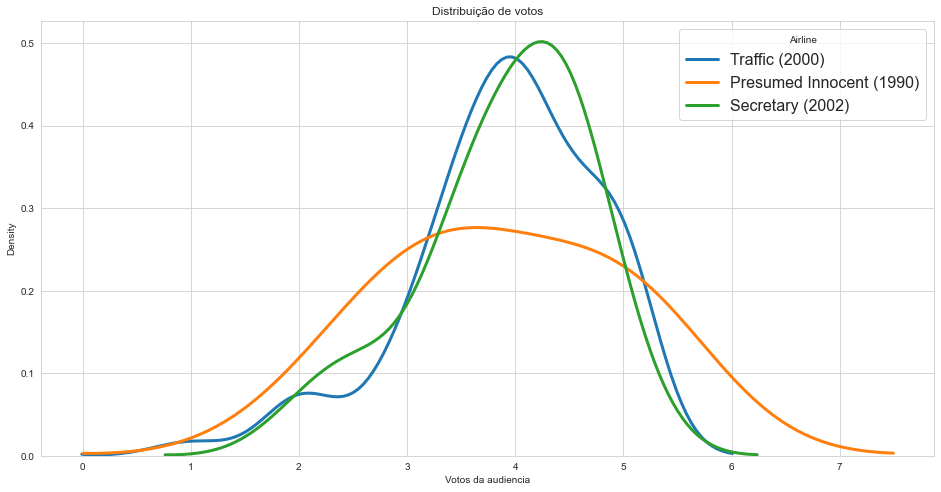

In [52]:
# Ou ainda:
plt.figure(figsize=(16,8))
titulos_filmes = ['Traffic (2000)', 'Presumed Innocent (1990)', 'Secretary (2002)']

for filme in titulos_filmes:
    subset = avaliacoes_subset[avaliacoes_subset['titulo'] == filme]
    
    sns.distplot(subset['nota_usuario'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = filme)
    

plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Distribuição de votos')
plt.xlabel('Votos da audiencia')
plt.ylabel('Density')
plt.show()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [53]:
# Repetindo o código do desafio 1:
filmes_com_media.rename(columns={'nota':'nota_média'}, inplace=True)
filmes_com_media.head()

total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
total_votos_por_filme.head()

# E agora é só fazer um join
filmes_com_media = filmes_com_media.join(total_votos_por_filme, on = "filmeId")

# Vamos mudar o nome da coluna novamente
filmes_com_media.rename(columns={'nota':'Total_votos'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_média,Total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [54]:
# Esses são os filmes com maio número de votos:
top10_filmes = filmes_com_media.nlargest(10, ['Total_votos'])

keys = filmes_com_media.nlargest(10, ['Total_votos'])["filmeId"]
avaliacoes_subset2 = avaliacoes[avaliacoes['filmeId'].isin(keys)]
avaliacoes_subset2 = avaliacoes_subset2.merge(top10_filmes, on="filmeId", how='left')
avaliacoes_subset2.head()



,usuarioId,filmeId,nota,momento,titulo,generos,nota_média,Total_votos
0,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War,4.031646,237.0
1,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
2,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
3,1,356,4.0,964980962,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
4,1,480,4.0,964982346,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0


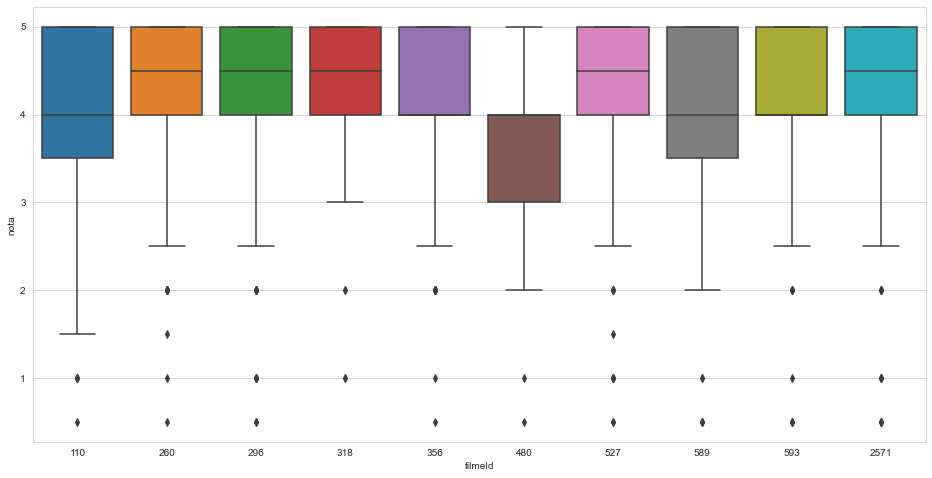

In [55]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.boxplot(data = avaliacoes_subset2, x ="filmeId", y="nota")
plt.show()

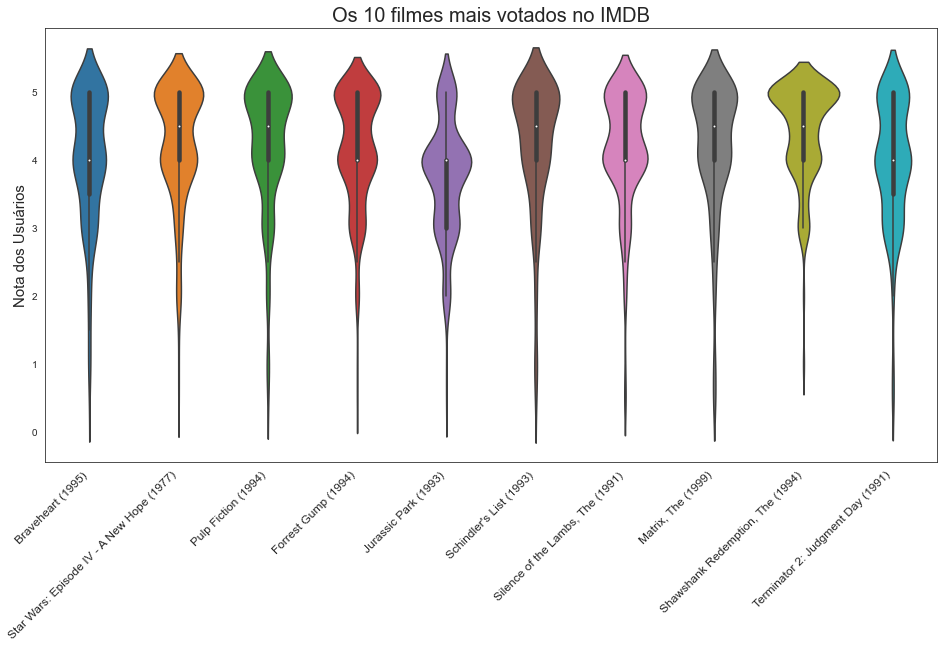

In [56]:
# Acho o violin plot mais legal:
plt.figure(figsize=(16,8))
sns.set_style("white")

movies_violin = sns.violinplot(data=avaliacoes_subset2, 
                x ="titulo", y="nota")
movies_violin.set_xticklabels(
    movies_violin.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 12
)
plt.xlabel('')
plt.ylabel('Nota dos Usuários', fontsize = 15)
plt.title('Os 10 filmes mais votados no IMDB', fontsize = 20)

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [57]:
# Primeiro vamos fazer um join do dataset todo
avaliacoes_subset3 = avaliacoes.merge(filmes_com_media, on="filmeId", how='left')
avaliacoes_subset3.head()

,usuarioId,filmeId,nota,momento,titulo,generos,nota_média,Total_votos
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,3.946078,102.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.975369,203.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,204.0


Text(0.5, 1.0, 'Filmes e notas dos usuários')

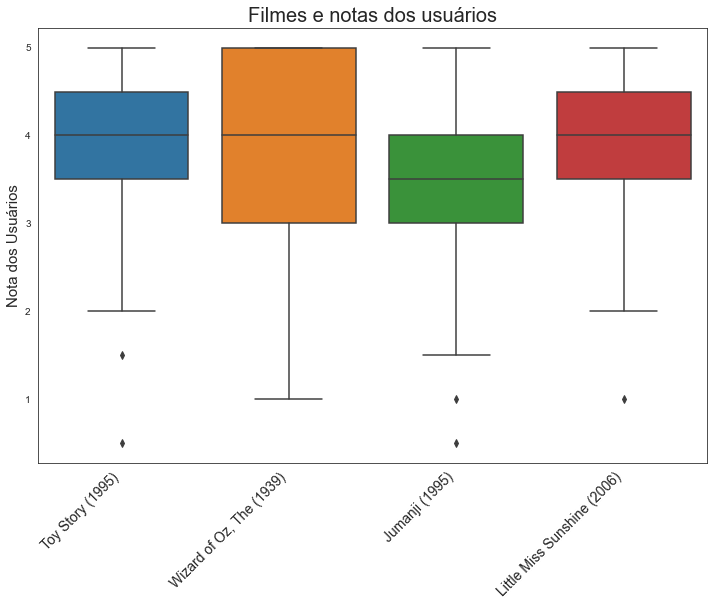

In [58]:
plt.figure(figsize=(12,8))

filmes_box = sns.boxplot(data = avaliacoes_subset3.query("filmeId in [1,2,919,46578]"), x ="titulo", y="nota")

filmes_box.set_xticklabels(
    filmes_box.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 14
)
plt.xlabel('')
plt.ylabel('Nota dos Usuários', fontsize = 15)
plt.title('Filmes e notas dos usuários', fontsize = 20)

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [68]:
# Mediana
Mediana_filmes = pd.DataFrame(avaliacoes_subset3.groupby("filmeId")["nota"].median())
Mediana_filmes = Mediana_filmes.reset_index()
Mediana_filmes.columns = ['filmeId', 'Mediana']
Mediana_filmes.head()

,filmeId,Mediana
0,1,4.0
1,2,3.5
2,3,3.0
3,4,3.0
4,5,3.0


In [78]:
#Moda
Moda_filmes = pd.DataFrame(avaliacoes_subset3.groupby(["filmeId"])["nota"].agg(lambda x:x.value_counts().index[0]))
Moda_filmes = Moda_filmes.reset_index()
Moda_filmes.columns = ['filmeId', 'Moda']
Moda_filmes

,filmeId,Moda
0,1,4.0
1,2,4.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5


In [80]:
# Media nós já temos
Media_filmes = pd.DataFrame(avaliacoes_subset3.groupby(["titulo","filmeId"])["nota"].mean()).reset_index()
Media_filmes.columns = ['titulo', 'filmeId', 'Media']
Media_filmes.head()

,titulo,filmeId,Media
0,'71 (2014),117867,4.0
1,'Hellboy': The Seeds of Creation (2004),97757,4.0
2,'Round Midnight (1986),26564,3.5
3,'Salem's Lot (2004),27751,5.0
4,'Til There Was You (1997),779,4.0


In [81]:
# Agora vamos juntar as tabelas
stats_filmes = Media_filmes.merge(Mediana_filmes, on="filmeId", how='left')
stats_filmes = stats_filmes.merge(Moda_filmes, on="filmeId", how='left')
stats_filmes

,titulo,filmeId,Media,Mediana,Moda
0,'71 (2014),117867,4.000000,4.0,4.0
1,'Hellboy': The Seeds of Creation (2004),97757,4.000000,4.0,4.0
2,'Round Midnight (1986),26564,3.500000,3.5,3.5
3,'Salem's Lot (2004),27751,5.000000,5.0,5.0
4,'Til There Was You (1997),779,4.000000,4.0,5.0
...,...,...,...,...,...
9719,eXistenZ (1999),2600,3.863636,4.0,4.0
9720,xXx (2002),5507,2.770833,3.0,3.5
9721,xXx: State of the Union (2005),33158,2.000000,2.0,1.5
9722,¡Three Amigos! (1986),2478,3.134615,3.0,3.0


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


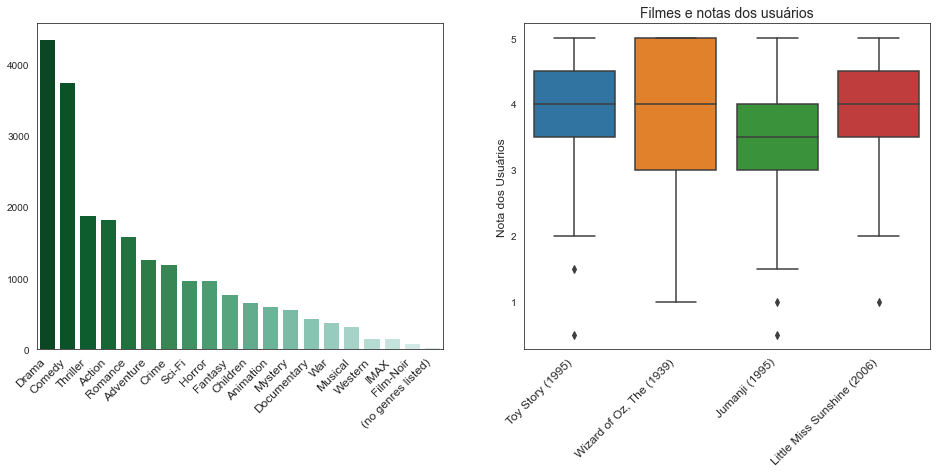

In [61]:
sns.set_style('white')
f, ax = plt.subplots(1,2, figsize=(16,6),sharex=False, sharey=False)

green_chart = sns.barplot(x=filmes_por_genero.index,
                          y=filmes_por_genero.values,
                          palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4), ax=ax[0])

green_chart.set_xticklabels(
    green_chart.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 12)

filmes_box = sns.boxplot(data = avaliacoes_subset3.query("filmeId in [1,2,919,46578]"), x ="titulo", y="nota",
                             ax=ax[1])

filmes_box.set_xticklabels(
    filmes_box.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 12)
plt.xlabel('')
plt.ylabel('Nota dos Usuários', fontsize = 12)
plt.title('Filmes e notas dos usuários', fontsize = 14)

plt.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [86]:
# Do que eu consigo ver aqui, só temos os anos no nomes dos filmes, 
# enão primeiro temos que extrair isso pra uma coluna

# Acontece que alguns filmes tem numeros no nome, e por isso temos que ser especificos e capturar os anos
# por isso a expressão regular usada para extrair os numeros dentro de um parenthesis

avaliacoes_subset3['Year'] = avaliacoes_subset3['titulo'].str.extractall(r'(\([\d]{4}\))').unstack().loc[:,0][0]
# agora extrair os parentesis
avaliacoes_subset3['Year'] = avaliacoes_subset3['Year'].str.extractall('(\d+)').unstack().loc[:,0]
avaliacoes_subset3.head()

,usuarioId,filmeId,nota,momento,titulo,generos,nota_média,Total_votos,Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,3.946078,102.0,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.975369,203.0,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,204.0,1995


In [126]:
print(avaliacoes_subset3.info())
media_por_ano = pd.DataFrame(avaliacoes_subset3.groupby("Year")["nota"].mean())
media_por_ano = media_por_ano.reset_index()
media_por_ano.columns = ['Ano', 'Media']
media_por_ano.Ano = pd.to_datetime(media_por_ano.Ano)
print(avaliacoes_subset3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   usuarioId    100836 non-null  int64  
 1   filmeId      100836 non-null  int64  
 2   nota         100836 non-null  float64
 3   momento      100836 non-null  int64  
 4   titulo       100836 non-null  object 
 5   generos      100836 non-null  object 
 6   nota_média   100836 non-null  float64
 7   Total_votos  100836 non-null  float64
 8   Year         100818 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 7.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   usuarioId    100836 non-null  int64  
 1   filmeId      100836 non-null  int64  
 2   nota         100836 non-null  float64
 3   momento      100836 

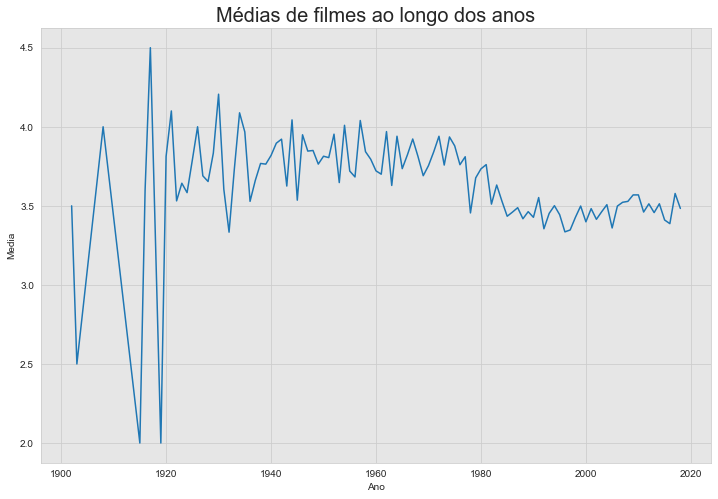

In [127]:
# Agora finalmente, o gráfico pedido
sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,8))
evolucao_plot = sns.lineplot(x = "Ano", y = "Media", data = media_por_ano)
plt.title('Médias de filmes ao longo dos anos', fontsize = 20)
plt.show()

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!